# ECG Data Preprocessing Example

This notebook demonstrates how to use the `data_preprocess.py` module for loading, cleaning, and optionally splitting ECG dataset for time series analysis. The focus is on handling null and infinite values and preparing the dataset for further analysis or model training.


In [1]:
#Import Required Libraries
import sys
# Update the path below according to your project structure
sys.path.append('../src')

import pandas as pd
import numpy as np

from data_preprocess import load_data, check_and_clean_data, preprocess_data


/Users/mahdihabibi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Loading and Preprocessing the Dataset

In [2]:
# Path to the dataset. 
file_path_train = '../data/ecg_train.csv'
file_path_test = '../data/ecg_test.csv'

# Loading and preprocessing the training dataset
ecg_train = preprocess_data(file_path_train, sep=',', header=None, split=False)
print("Training dataset after preprocessing:")
print(ecg_train.head())

# Loading and preprocessing the testing dataset
ecg_test = preprocess_data(file_path_test, sep=',', header=None, split=False)
print("Testing dataset after preprocessing:")
print(ecg_test.head())


Removed 1 rows with null or infinite values.
Training dataset after preprocessing:
   0        1        2        3        4        5        6        7     \
0   3.0  0.39475  0.42683  0.40271  0.36694  0.40403  0.42741  0.42354   
1   2.0 -0.25097 -0.24359 -0.17080 -0.16245 -0.17461 -0.17786 -0.17280   
2   4.0  0.76671  0.77335  0.76703  0.76831  0.77436  0.77349  0.77428   
3   3.0 -0.11454 -0.12602 -0.15173 -0.18220 -0.18592 -0.18366 -0.18393   
4   3.0 -0.29191 -0.30657 -0.31069 -0.30988 -0.31269 -0.32061 -0.32349   

      8        9     ...     1630      1631      1632     1633      1634  \
0  0.45237  0.42515  ...  0.42560  0.423450  0.439390  0.45879  0.452610   
1 -0.17083 -0.17054  ... -0.23849 -0.241870 -0.244640 -0.24521 -0.243480   
2  0.77122  0.76613  ...  0.75079  0.753830  0.759440  0.76402  0.769820   
3 -0.16847 -0.15904  ... -0.02097 -0.023981 -0.037699 -0.05316 -0.049396   
4 -0.31899 -0.33060  ... -0.23937 -0.254440 -0.262070 -0.26039 -0.258970   

       1635    

In [3]:
# Check info
ecg_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Columns: 1640 entries, 0 to 1639
dtypes: float64(1640)
memory usage: 2.3 MB


In [4]:
# Check info
ecg_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 1640 entries, 0 to 1639
dtypes: float64(1640)
memory usage: 512.6 KB


In [5]:
# Split train dataset into 1 column for targets/classes and features
from data_preprocess import split_data

ecg_train_x, ecg_train_y = split_data(ecg_train, target_column=0, split=True)
print("Training features:")
print(ecg_train_x.head())
print("Training targets:")
print(ecg_train_y.head())

Training features:
      1        2        3        4        5        6        7        8     \
0  0.39475  0.42683  0.40271  0.36694  0.40403  0.42741  0.42354  0.45237   
1 -0.25097 -0.24359 -0.17080 -0.16245 -0.17461 -0.17786 -0.17280 -0.17083   
2  0.76671  0.77335  0.76703  0.76831  0.77436  0.77349  0.77428  0.77122   
3 -0.11454 -0.12602 -0.15173 -0.18220 -0.18592 -0.18366 -0.18393 -0.16847   
4 -0.29191 -0.30657 -0.31069 -0.30988 -0.31269 -0.32061 -0.32349 -0.31899   

      9        10    ...     1630      1631      1632     1633      1634  \
0  0.42515  0.62191  ...  0.42560  0.423450  0.439390  0.45879  0.452610   
1 -0.17054 -0.17127  ... -0.23849 -0.241870 -0.244640 -0.24521 -0.243480   
2  0.76613  0.76752  ...  0.75079  0.753830  0.759440  0.76402  0.769820   
3 -0.15904 -0.16089  ... -0.02097 -0.023981 -0.037699 -0.05316 -0.049396   
4 -0.33060 -0.33954  ... -0.23937 -0.254440 -0.262070 -0.26039 -0.258970   

       1635      1636      1637      1638      1639  
0  0.41

In [6]:
# Check for Class Imbalance
print(ecg_train_y.value_counts(normalize=True))

0
4.0    0.278075
2.0    0.245989
1.0    0.240642
3.0    0.235294
Name: proportion, dtype: float64


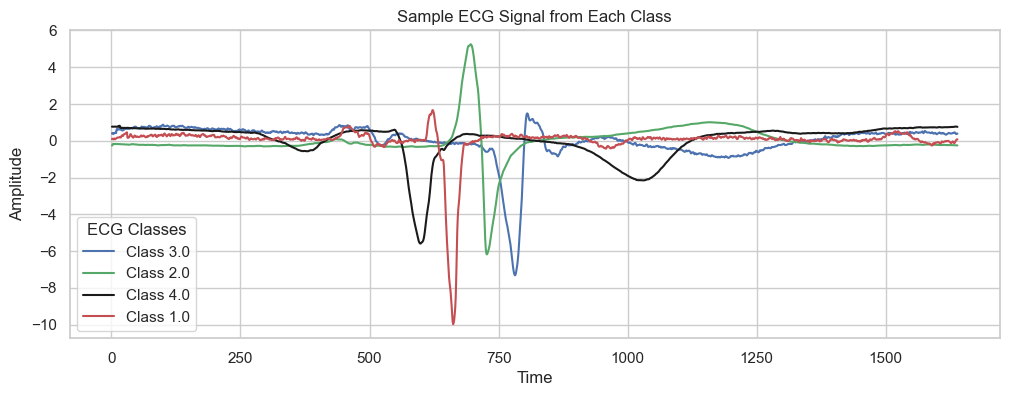

In [7]:
from visualization import plot_sample_signals

# Plots one sample signal from each class in the dataset
plot_sample_signals(ecg_train_x, ecg_train_y)


In [8]:
# Split test dataset into 1 column for targets/classes and features
from data_preprocess import split_data

ecg_test_x, ecg_test_y = split_data(ecg_test, target_column=0, split=True)
print("Testing features:")
print(ecg_test_x.head())
print("Testing targets:")
print(ecg_test_y.head())

Testing features:
       1         2         3         4         5         6         7     \
0 -1.100900 -1.136300 -0.269700 -0.287390 -0.252010 -0.216640 -0.181270   
1  0.277960  0.293750  0.323010  0.312740  0.266580  0.233220  0.243510   
2 -0.259780 -0.257880 -0.258900 -0.248390 -0.227680 -0.229630 -0.252780   
3 -0.100410 -0.068534 -0.051683 -0.066385 -0.089782 -0.084242 -0.056820   
4  0.083505  0.079466  0.075540  0.083133  0.079600  0.061685  0.060065   

       8         9         10    ...      1630      1631     1632      1633  \
0 -0.163590 -0.092842 -0.110530  ... -0.234330 -0.252010 -0.30507 -0.393500   
1  0.256340  0.225550  0.210100  ...  0.250930  0.276540  0.28621  0.267300   
2 -0.256260 -0.256170 -0.277070  ... -0.258200 -0.259100 -0.25693 -0.239240   
3 -0.056761 -0.080574 -0.084783  ... -0.169920 -0.178470 -0.16660 -0.145190   
4  0.078609  0.095152  0.104660  ...  0.003916  0.023833  0.05540  0.079133   

       1634     1635      1636      1637      1638      

In [9]:
print("Shape of ecg_train:", ecg_train.shape)
print("Shape of ecg_train_x (features):", ecg_train_x.shape)
print("Shape of ecg_train_y (labels):", ecg_train_y.shape)

print("Shape of ecg_test:", ecg_test.shape)
print("Shape of ecg_test_x (features):", ecg_test_x.shape)
print("Shape of ecg_test_y (labels):", ecg_test_y.shape)

Shape of ecg_train: (187, 1640)
Shape of ecg_train_x (features): (187, 1639)
Shape of ecg_train_y (labels): (187,)
Shape of ecg_test: (40, 1640)
Shape of ecg_test_x (features): (40, 1639)
Shape of ecg_test_y (labels): (40,)


In [10]:
from data_preprocess import prepare_for_conv1d_training

# Prepares the dataset for Conv1D training:
# reshapes features and one-hot encodes labels.

X_train, y_train = prepare_for_conv1d_training(ecg_train_x, ecg_train_y, num_classes=4)
X_test, y_test = prepare_for_conv1d_training(ecg_test_x, ecg_test_y, num_classes=4)

In [11]:
print("Shape of X_train (features):", X_train.shape)
print("Shape of y_train (labels):", y_train.shape)

print("Shape of X_test (features):", X_test.shape)
print("Shape of y_test (labels):", y_test.shape)

Shape of X_train (features): (187, 1639, 1)
Shape of y_train (labels): (187, 4)
Shape of X_test (features): (40, 1639, 1)
Shape of y_test (labels): (40, 4)


In [12]:
from model_training import create_cnn_model

input_shape = (X_train.shape[1], 1)
num_classes = y_train.shape[1]

model = create_cnn_model(input_shape, num_classes)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1637, 64)          256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 818, 64)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 818, 64)           0         
                                                                 
 flatten (Flatten)           (None, 52352)             0         
                                                                 
 dense (Dense)               (None, 100)               5235300   
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                        

In [13]:
# Train the CNN model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
6/6 [==============================] - 0s 31ms/step - loss: 0.7063 - accuracy: 0.6786 - val_loss: 0.0547 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 0s 13ms/step - loss: 0.0436 - accuracy: 0.9762 - val_loss: 0.0908 - val_accuracy: 0.9474
Epoch 3/10
6/6 [==============================] - 0s 13ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.1949 - val_accuracy: 0.9474
Epoch 4/10
6/6 [==============================] - 0s 13ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1585 - val_accuracy: 0.9474
Epoch 5/10
6/6 [==============================] - 0s 13ms/step - loss: 3.3263e-04 - accuracy: 1.0000 - val_loss: 0.1075 - val_accuracy: 0.9474
Epoch 6/10
6/6 [==============================] - 0s 13ms/step - loss: 1.7152e-04 - accuracy: 1.0000 - val_loss: 0.0798 - val_accuracy: 0.9474
Epoch 7/10
6/6 [==============================] - 0s 13ms/step - loss: 1.3582e-04 - accuracy: 1.0000 - val_loss: 0.0658 - val_accuracy: 0.9474
Epoch 8/10
6/6 

In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy:', accuracy)

Test Accuracy: 0.949999988079071


In [15]:
# save the trained model
model.save('/Volumes/D/GitHub-Portfolio/LIME-for-Time-Series/models/my_ecg_model')


INFO:tensorflow:Assets written to: /Volumes/D/GitHub-Portfolio/LIME-for-Time-Series/models/my_ecg_model/assets


INFO:tensorflow:Assets written to: /Volumes/D/GitHub-Portfolio/LIME-for-Time-Series/models/my_ecg_model/assets


### LIME for TimeSerisDomain

#### Step 1) Select an instance for explanation

In [16]:
id_ecg = 15                          # Just for an example: choose an index from rows
instance_ecg = X_test[id_ecg, :]     # Extract the selected instance from the test dataset

In [17]:
# Predict the class of the selected signal by trained CNN model
probability_vector = model.predict(instance_ecg[np.newaxis, :])
print("Probability vector of the selected instance:", probability_vector)

1/1 [==============================] - 0s 43ms/step
Probability vector of the selected instance: [[1.71405088e-12 1.00594070e-05 9.99989986e-01 1.01751045e-10]]


In [18]:
# class labels
class_labels = [0, 1, 2, 3]

# Import and call the analyze_prediction function
from lime_explanation import analyze_prediction

top_pred_classes, predicted_class = analyze_prediction(probability_vector, class_labels)

print("Top predicted classes:", top_pred_classes)
print("Predicted Class for the selected instance:", predicted_class)


Top predicted classes: [2 1 3 0]
Predicted Class for the selected instance: 2


#### 2.1. Create segments in the selected ECG signal

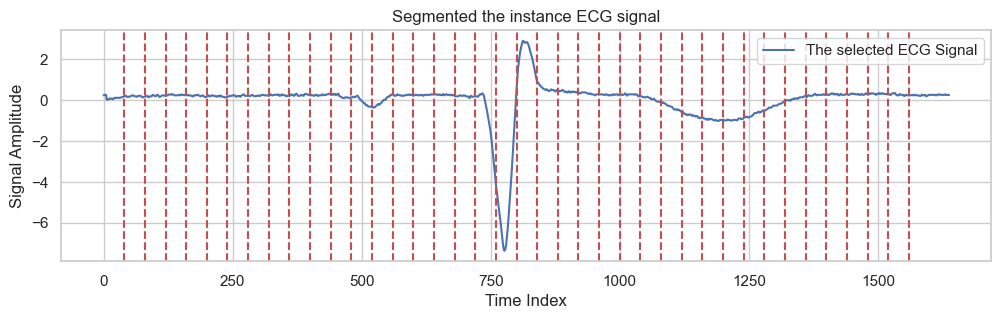

In [19]:
from lime_explanation import segment_ecg_signal
from visualization import plot_segmented_ecg

# Segmentation
slice_width = segment_ecg_signal(instance_ecg, num_slices=40)

# plot the segmented ECG signal
plot_segmented_ecg(instance_ecg, slice_width)


In [20]:
from lime_explanation import generate_random_perturbations

num_perturbations = 150
num_slices = 40  

random_perturbations = generate_random_perturbations(num_perturbations, num_slices)

# Example output
print("The shape of random_perturbations array (num_perturbations, num_slices):", random_perturbations.shape)
print("Example Perturbation:", random_perturbations[-1])


The shape of random_perturbations array (num_perturbations, num_slices): (150, 40)
Example Perturbation: [1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1]


In [21]:
from lime_explanation import apply_perturbation_to_ecg, perturb_mean

# Choose the perturbation function
perturb_function = perturb_mean  

# Apply a random perturbation to the ECG signal
perturbed_ecg_example = apply_perturbation_to_ecg(instance_ecg, random_perturbations[-1], num_slices, perturb_function)


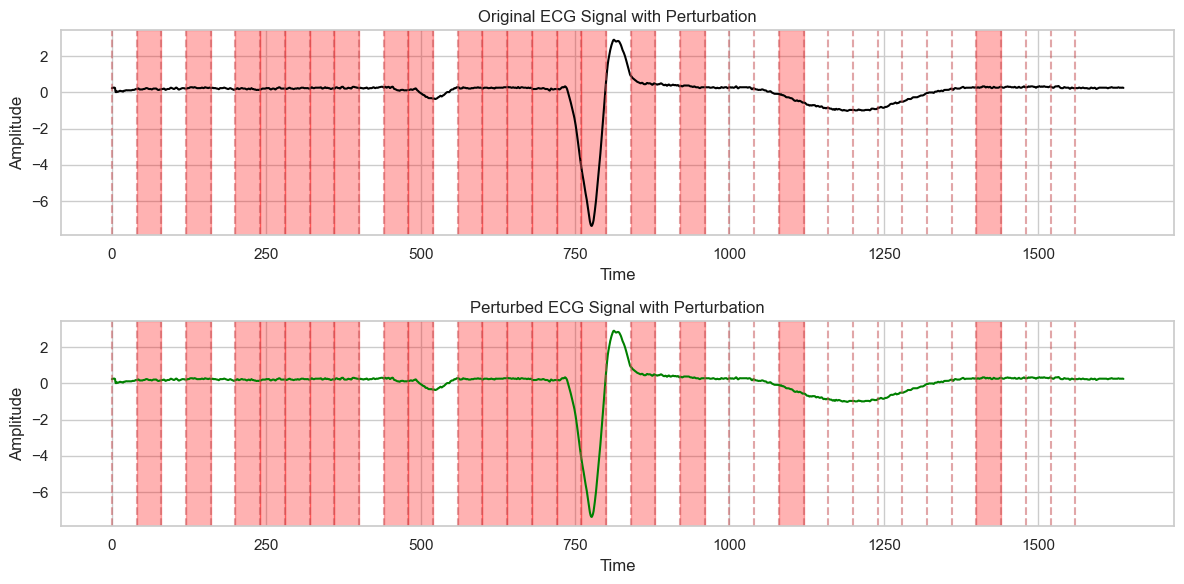

In [22]:
from visualization import plot_perturbed_ecg

# plot the original and perturbed ECG signals with highlighted slices and deactivated segments
plot_perturbed_ecg(instance_ecg, perturbed_ecg_example, random_perturbations[-1], num_slices, title='ECG Signal with Perturbation')


In [23]:
from lime_explanation import predict_perturbations

perturbation_predictions = predict_perturbations(model, instance_ecg, random_perturbations, num_slices, perturb_mean)


1/1 [==============================] - 0s 8ms/step


In [24]:
from lime_explanation import calculate_cosine_distances

cosine_distances = calculate_cosine_distances(random_perturbations, num_slices)
print("Shape of Cosine Distances Array:", cosine_distances.shape)


Shape of Cosine Distances Array: (150,)


In [25]:
from lime_explanation import calculate_weights_from_distances

kernel_width = 0.25  # This can be adjusted based on your specific needs

weights = calculate_weights_from_distances(cosine_distances, kernel_width)

# Now we have the weights for each perturbation for further analysis
print("Shape of Weights Array:", weights.shape)


Shape of Weights Array: (150,)


In [26]:
# Check the shape of perturbation predictions
print("Shape of perturbation_predictions:", perturbation_predictions.shape)

Shape of perturbation_predictions: (150, 1, 4)


In [27]:
from lime_explanation import fit_explainable_model

segment_importance_coefficients = fit_explainable_model(perturbation_predictions, random_perturbations, weights, target_class=top_pred_classes[0])

# Now we have the importance coefficients for each segment
print("Segment Importance Coefficients:", segment_importance_coefficients)


Segment Importance Coefficients: [-8.98103165e-32 -1.19553252e-31 -8.75436447e-32 -1.16746781e-31
 -2.08006124e-31 -1.24410799e-31 -8.54005356e-32 -1.33018803e-31
  6.71049384e-32 -8.13115462e-33  8.87598704e-32 -1.97642797e-31
 -1.80826973e-31 -3.76815942e-32 -1.90244645e-31 -1.42603345e-31
  2.23151836e-32  3.30199368e-33  1.53838670e-32  2.37764459e-32
 -1.64801128e-31 -6.57251494e-32 -2.47471415e-32 -1.73475932e-31
  6.38330860e-32 -1.42613325e-31 -1.64087421e-31 -4.31344673e-32
 -1.08365395e-31 -2.31394832e-31 -1.01154857e-31 -8.12744910e-32
 -1.23346260e-31  3.58944699e-32 -9.82430625e-32 -1.35773680e-31
 -1.55250307e-31 -3.57211162e-32 -7.09147828e-32 -1.43693943e-31]


In [28]:
from lime_explanation import identify_top_influential_segments

number_of_top_features = 5
top_influential_segments = identify_top_influential_segments(segment_importance_coefficients, number_of_top_features)

# Now we have the indices of the top influential segments
print("Top Influential Signal Segments:", top_influential_segments)


Top Influential Signal Segments: [12 14 11  4 29]


/Users/mahdihabibi/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mahdihabibi/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


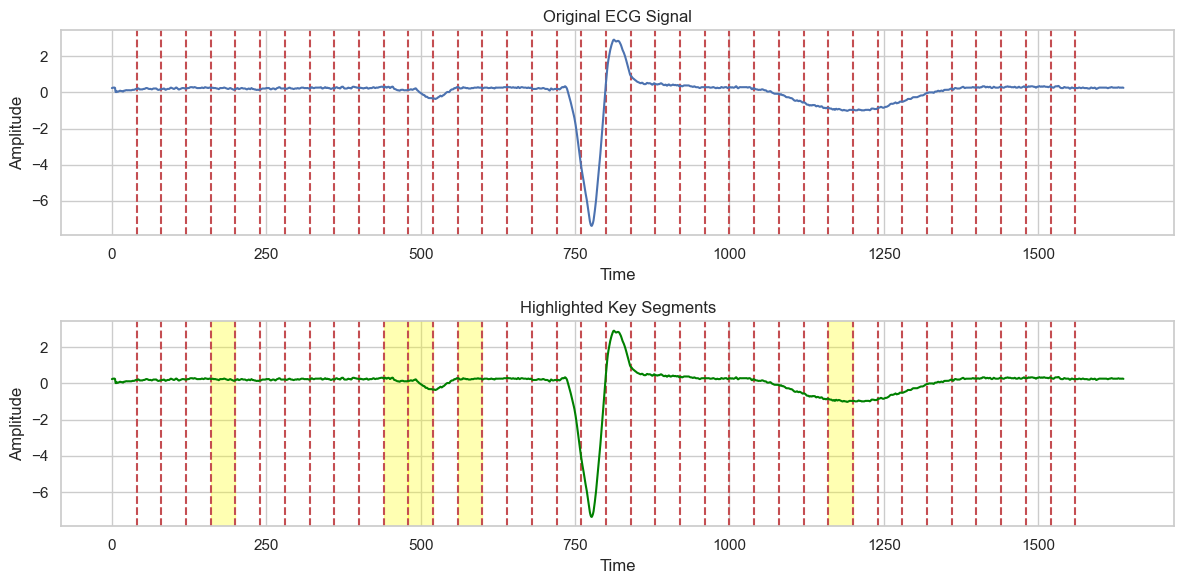

In [29]:
from visualization import visualize_lime_explanation

visualize_lime_explanation(instance_ecg, top_influential_segments, num_slices, perturb_function=perturb_mean)
